<a href="https://colab.research.google.com/github/FaezeMqFr/Generative-Models/blob/main/Copy_of_07_deep_computer_vision_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Computer Vision with Convolutional Neural Networks

**Chapter 14 – Deep Computer Vision Using Convolutional Neural Networks**

❗️ **This will be very slow, unless you are using a GPU for the later code**

❗️ **If you do not, then you should run this notebook in Colab, using a GPU runtime**

File name convention: For group 42 and memebers Richard Stallman and Linus <br> Torvalds it would be: <br>
"07_Stallman_Torvalds.pdf".

Submission via blackboard (UA).

Feel free to answer free text questions in text cells using markdown and <br>
possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended** <br>
**for you to try to understand every line of code.** <br>
**Big blocks of code are usually meant to just be clicked through.**

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torchvision
from tensorflow import keras

import numpy as np
import os

np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

Let's **import some data** to see how convolutional filters work. One is a scenic <br>
image of china and the other is an image of a flower. The first thing we should <br>
do is **normalize the pixels**.

2 427 640 3


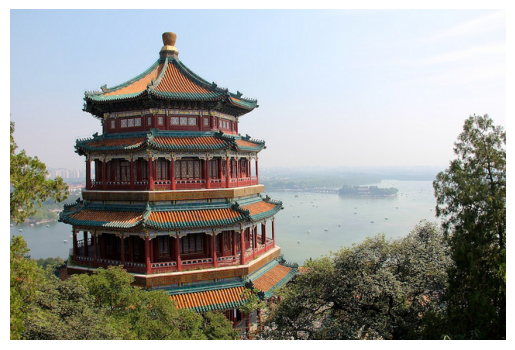

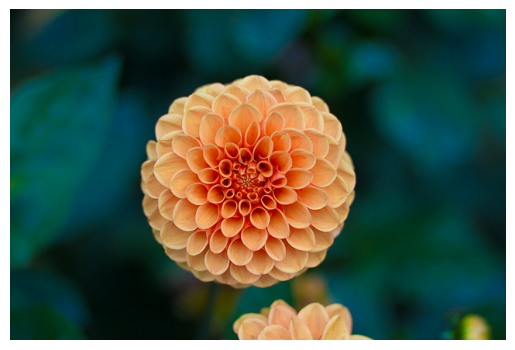

In [3]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(batch_size, height, width, channels)

images = torch.from_numpy(images).permute(0, 3, 1, 2)

plt.imshow(china)
plt.axis("off") # Not shown in the book
plt.show()
plt.imshow(flower)
plt.axis("off") # Not shown in the book
plt.show()

Next let's create some filters. Here we're creating image filters that have the <br>
shape **7x7x3x2**. So that's a 7x7 grid which will pass over three color channels <br>
and we have two filters for each of those dimensions. Here we want two filters <br>
as the final dimension to demonstrate creating **vertical** and **horizontal** filters.

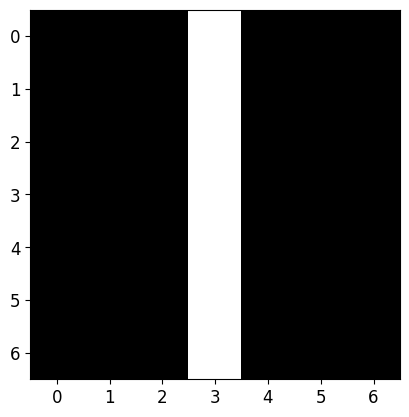

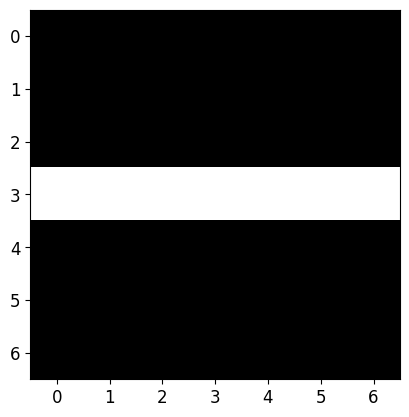

In [4]:
# Create 2 filters
filters = torch.zeros((2, channels, 7, 7), dtype=torch.float32)
filters[0, :, :, 3] = 1  # vertical line
filters[1, :, 3, :] = 1  # horizontal line
plt.imshow(torch.moveaxis(filters[0,:,:,:], 0, 2))
plt.show()
plt.imshow(torch.moveaxis(filters[1,:,:,:], 0, 2))
plt.show()

Notice that when we look at the shape of the outputs of our filters it now has <br>
**final dimension 2 instead of 3**. What we've done here is **reduced our 3** red, <br>
green, blue **(RGB) channels to two filter channels** that have picked out the <br>
vertical and horizontal lines in all three color channels then added them up.

In [5]:
print(images.shape)
print(filters.shape)

torch.Size([2, 3, 427, 640])
torch.Size([2, 3, 7, 7])


torch.Size([2, 2, 427, 640])


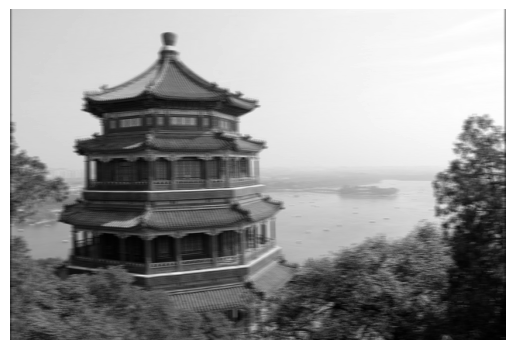

In [6]:
outputs = nn.functional.conv2d(images.to(torch.float32), weight=filters, bias=None, stride=1, padding='same')
print(outputs.shape)

plt.imshow(outputs[0, 1, :, :], cmap='gray') # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

In [7]:
def crop(images):
    try:
      return images[:, 150:220, 130:250]
    except:
      return images[150:220, 130:250]

Let's look at our different color channels to see what an unfiltered image <br>
looks like.

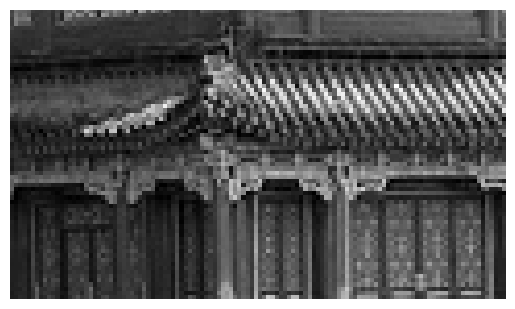

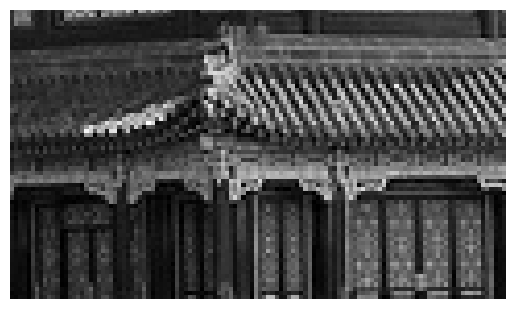

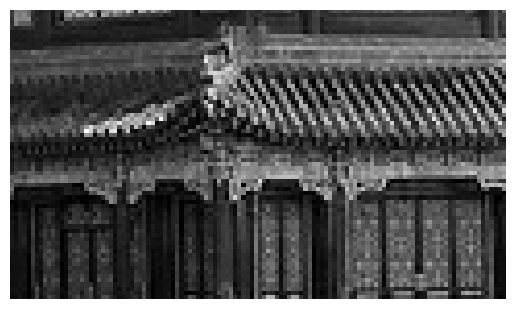

In [8]:
plot_image(crop(images[0, 0, :, :]))
plt.show()
plot_image(crop(images[0, 1, :, :]))
plt.show()
plot_image(crop(images[0, 2, :, :]))
plt.show()

# Basics: Filters and Pooling

## Task 1: Filters

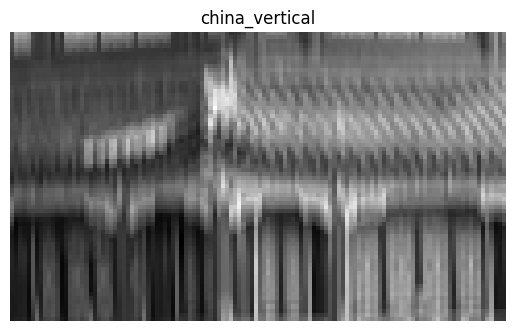

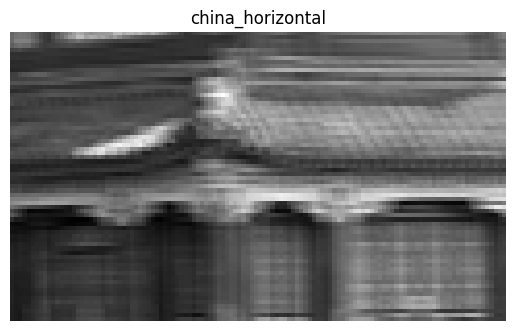

In [9]:
for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, feature_map_index, :, :]))
    plt.title(filename)
    plt.show()

**Task 1 a)**: Describe how the filters work and what their purpose in a CNN is.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

**Task 1 a) answer:** Filters are specially designed mathematical functions that are applied convolution operation to the input image. These filters have a receptive field, which encompasses a small region of the image. The filter slides over the image, computing the dot product or inner product between its receptive field and each pixel in the image.

The purpose of filters in CNNs is to extract meaningful features from the input images. These filters are trained on large datasets of labeled images, enabling them to learn and recognize patterns that are relevant to the task at hand. Filters capture specific things in an image, like edges, corners, textures, or patterns. By sliding the filter across the image, the CNN can learn to recognize these features and extract relevant information. Basically, each layer has multiple filters, and the output of one layer feeds into the next. By stacking these layers on top of each other, CNNs can extract more and more features.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Convolutional Layer in Pytorch

To create a 2D convolutional layer use `nn.Conv2d` <br>
(https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html).

**Task 1 b)**    
Create a convolutional layer with 32 filters and `kernel_size` `(3,3)`. <br>
Apply it to `images[0:1]` and explain the shape of the output. **Do not** <br>
**explicitly pass any filters** this time. Instead, use the default random <br>
initialization for pytorch convolutional layers. Run it a couple of times and <br>
notice that you get a different image each time.

You can plot the resulting images if you want (for example `plot_image` <br>
`(new_images[0,0,:,:])` for the first filter).

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Initial output shape 1: (1, 32, 425, 638)
Initial output shape 2: (1, 32, 425, 638)


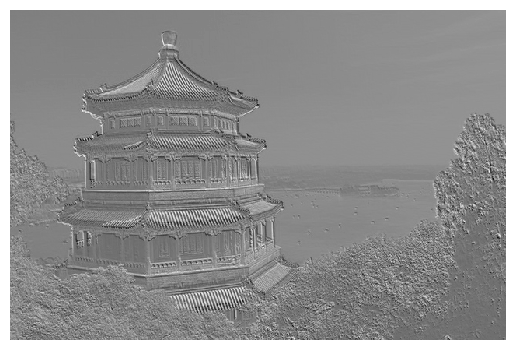

In [10]:
#conv2d_layer = nn.Conv2d(in_channels=...
#im = images[0:1].to(torch.float32)
#new_images = conv2d_layer(im).detach().numpy()
#print(new_images.shape) #EXPLAIN THIS BELOW
#plot_image(new_images[0,0,:,:])


for i in range(2):
    conv2d_layer = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3))

    im = images[0:1].to(torch.float32)
    new_images = conv2d_layer(im).detach().numpy()

    print(f"Initial output shape {i+1}:", new_images.shape)

    # Plot the output of the first filter
    plot_image(new_images[0, 0, :, :])

Task 1b) shape explanation: **The output shape is (1, 32, 30, 30), where: 1 indicates the batch size (one image in this case), 32 indicates the number of output channels or filters,(425, 638) are the dimensions of the image. Due to a convolution operation with a 3 x 3 kernel without padding, the output images are a little shorter than the original 32 x 32.**

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Cropping the Images

In [11]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)

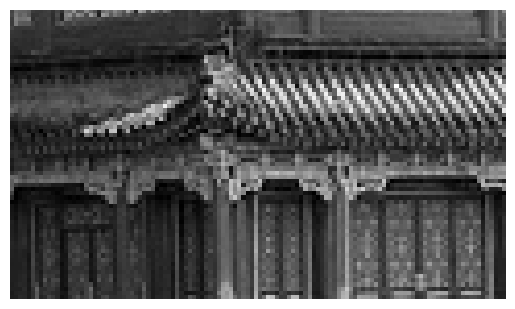

In [12]:
plot_image(cropped_images[0, 0, :, :])
plt.show()

## Task 2: Max Pooling Layer in Pytorch

Pooling layers are used to **shrink the input image** in order to reduce the <br> computational load, the memory usage, and the number of parameters.

**Task 2 a)** <br>
- Create a max pool layer of kernel_size=(2,2) <br>
(https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)
- apply the max pool layer to the `cropped_images` assigning the result to the <br>
variable `output`
- **Note:** Be sure to convert the input `cropped_images` to tensor and to <br>
the right datatype beforehand using <br>
`torch.from_numpy(cropped_images).to(torch.float32)` and use <br>
`.detach().numpy()` afterward to convert your model output to numpy for <br> visualization.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [13]:
# maxpool_layer = nn.MaxPool2d(...
cropped_images_tensor = torch.from_numpy(cropped_images).to(torch.float32)
maxpool_layer = nn.MaxPool2d(kernel_size=(2,2))

In [14]:
# output =
output = maxpool_layer(cropped_images_tensor).detach().numpy()

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

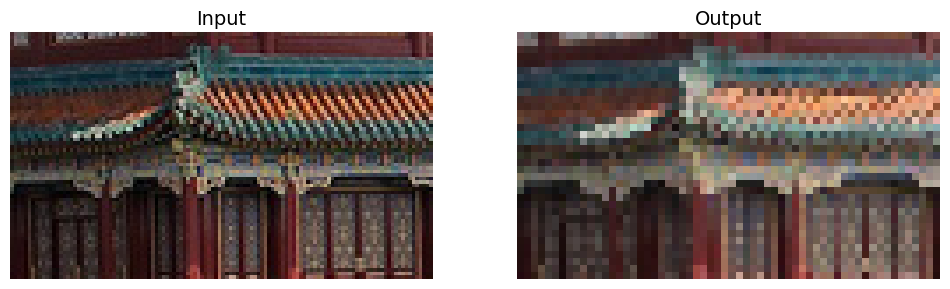

In [15]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(np.moveaxis(cropped_images[0], 0, 2))  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(np.moveaxis(output[0], 0, 2))  # plot the output for the 1st image
ax2.axis("off")
plt.show()

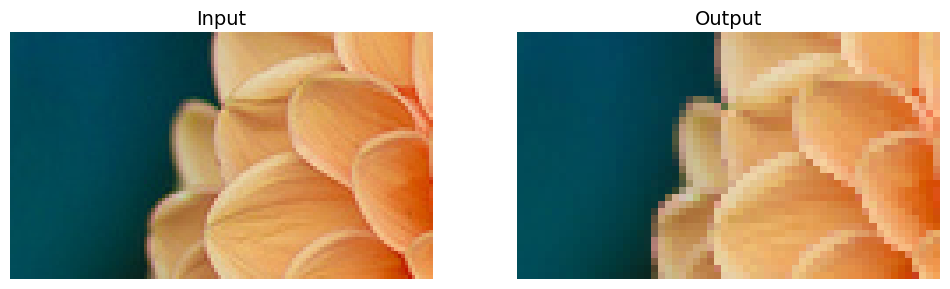

In [16]:

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(np.moveaxis(cropped_images[1], 0, 2))
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(np.moveaxis(output[1], 0, 2))
ax2.axis("off")
plt.show()

**Task 2 b)**

Describe the effect of the max pooling layer. What are its benefits for a <br> Neural Network? What are the downsides?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 2b) answer: **Max pooling layers apply a max operation to the input feature maps in neural networks. The layer helps reduce the size of the feature maps while preserving the most important stuff. Max pooling has several advantages for neural networks. The first thing it does is reduce the dimensionality of the feature maps. Second, max pooling can help improve computational efficiency. By reducing the size and number of feature maps, it reduces the required computational resources for forward propagation and backpropagation through the network. It's especially useful for networks that need a lot of computation. Additionally, the max pooling layer can help mitigate overfitting. Overfitting occurs when a model learns the training data too well, but fails to generalize to unseen data. A max pooling layer reduces the contributions of less important features to the feature maps, which can prevent overfitting and improve generalization.Despite its benefits, max pooling has some limitations. The first thing is that it introduces spatial smoothing, which means the features become less precise. It can be helpful in some cases, but it can also lose detail in others. Second, max pooling can lose spatial information. Max pooling reduces spatial locality by averaging activations over a larger area. When the model loses spatial information, it can't capture spatial patterns, which is important for tasks like object recognition and image segmentation.**


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Tackling Fashion MNIST With a CNN

In [17]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# normalization
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std


#Notice that pytorch convolutional layers expect the 1-axis to be the channels
#dimension whereas generally linear layers will act on the last axis.

X_train = X_train[:, np.newaxis, ...]
X_valid = X_valid[:, np.newaxis, ...]
X_test = X_test[:, np.newaxis, ...]

In [18]:
class ClassificationDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.copy()).float()
        self.y = torch.from_numpy(y.copy()).long()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_data = ClassificationDataset(X_train, y_train)
valid_data = ClassificationDataset(X_valid, y_valid)
test_data = ClassificationDataset(X_test, y_test)

batch_size = 256

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)

In [19]:
from functools import partial

DefaultConv2d = partial(nn.Conv2d,
                        kernel_size=3, padding='same')

model = nn.Sequential(
    DefaultConv2d(in_channels=1, out_channels=64, kernel_size=7),
    nn.MaxPool2d(kernel_size=(2,2)),
    DefaultConv2d(in_channels=64, out_channels=128),
    DefaultConv2d(in_channels=128, out_channels=128),
    nn.MaxPool2d(kernel_size=(2,2)),
    DefaultConv2d(in_channels=128, out_channels=256),
    DefaultConv2d(in_channels=256, out_channels=256),
    nn.MaxPool2d(kernel_size=(2,2)),
    nn.Flatten(),
    nn.Linear(in_features=64*36, out_features=128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(in_features=128, out_features=64),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(in_features=64, out_features=10),
    nn.Softmax(dim=-1)
)

### Visualization of Model Structure
This is not necessary, but maybe interesting.

In [20]:
!pip install torchviz

In [21]:
from torchviz import make_dot
x = torch.randn(1,1,28,28)
y = model(x)

#make_dot generates an image of your model and .render() outputs it to a file.
#Click the folder icon on the left side of colab and you should see a file
#call model_image.png that shows the model
make_dot(y.mean(), params=dict(model.named_parameters())).render("model_image", format="png")

'model_image.png'

### Training and Testing Loops
Note that compared to previous training loops this one has now introduced the <br>
concept of a **"device"**. Here that is included so that you can use **GPU** for the <br>
larger models in this notebook like ResNet. The correct way to use a device <br>
is to **pass the model and data to the same device *before* doing operations**. <br>
GPU's are a type of processor that are especially good at matrix-based <br>
operations such as those used in graphics as well as machine learning.

In [22]:
def train_and_validate(train_loader, val_loader, model, optimizer, criterion, num_epochs, metric=None, scheduler=None, device='cpu'):
    history = {
        'epoch': [],
        'train_loss': [],
        'train_metric': [],
        'val_loss': [],
        'val_metric': [],
        'learning_rate': []
    }  # Initialize a dictionary to store epoch-wise results

    model.to(device)  # Move the model to the specified device

    with torch.no_grad():
        proper_dtype = torch.int64
        X,y = next(iter(train_loader))
        X = X.to(device)
        y = y.to(device)
        try:
            loss = criterion(model(X), y.to(proper_dtype))
        except:
            try:
                proper_dtype = torch.float32
                loss = criterion(model(X), y.to(proper_dtype))
            except:
                print("No valid data-type could be found")

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        epoch_loss = 0.0  # Initialize the epoch loss and metric values
        epoch_metric = 0.0

        # Training loop
        for X, y in train_loader:
            X = X.to(device)
            y = y.to(device)
            y = y.to(proper_dtype)
            optimizer.zero_grad()  # Clear existing gradients
            outputs = model(X)  # Make predictions
            loss = criterion(outputs, y)  # Compute the loss
            loss.backward()  # Compute gradients
            optimizer.step()  # Update model parameters

            epoch_loss += loss.item()

            # THESE LINES HAVE BEEN UPDATED TO ACCOUNT FOR DEFAULT ARGUMENTS
            if metric is not None:
                epoch_metric += metric(outputs, y)
            else:
                epoch_metric += 0.0

        # Average training loss and metric
        epoch_loss /= len(train_loader)
        epoch_metric /= len(train_loader)

        # Validation loop
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation
            val_loss = 0.0
            val_metric = 0.0
            for X_val, y_val in val_loader:
                X_val = X_val.to(device)
                y_val = y_val.to(device)
                y_val = y_val.to(proper_dtype)
                outputs_val = model(X_val)  # Make predictions
                val_loss += criterion(outputs_val, y_val).item()  # Compute loss
                if metric is not None:
                    val_metric += metric(outputs_val, y_val)
                else:
                    val_metric += 0.0

            val_loss /= len(val_loader)
            val_metric /= len(val_loader)

        # Append epoch results to history
        history['epoch'].append(epoch)
        history['train_loss'].append(epoch_loss)
        history['train_metric'].append(epoch_metric)
        history['val_loss'].append(val_loss)
        history['val_metric'].append(val_metric)
        history['learning_rate'].append(optimizer.param_groups[0]['lr'])

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, '
              f'Train Metric: {epoch_metric:.4f}, Val Loss: {val_loss:.4f}, '
              f'Val Metric: {val_metric:.4f}')

        if scheduler is not None:
            scheduler.step()

    return history, model

In [23]:
def test_model(model, data_loader, criterion, metric=None, device='cpu'):
    model.to(device)  # Move the model to the specified device

    model.eval()  # Set the model to evaluation mode

    total_loss = 0.0  # Initialize the total loss and metric values
    total_metric = 0.0

    with torch.no_grad():
        proper_dtype = torch.int64
        X,y = next(iter(data_loader))
        X = X.to(device)
        y = y.to(device)
        try:
            loss = criterion(model(X), y.to(proper_dtype))
        except:
            try:
                proper_dtype = torch.float32
                loss = criterion(model(X), y.to(proper_dtype))
            except:
                print("No valid data-type could be found")


    with torch.no_grad():  # Disable gradient tracking
        for batch in data_loader:
            X, y = batch
            X = X.to(device)
            y = y.to(device)
            y = y.to(proper_dtype)
            # Pass the data to the model and make predictions
            outputs = model(X)

            # Compute the loss
            loss = criterion(outputs, y)

            # Add the loss and metric for the batch to the total values
            total_loss += loss.item()

            if metric is not None:
                total_metric += metric(outputs, y)
            else:
                total_metric += 0.0

    # Average loss and metric for the entire dataset
    avg_loss = total_loss / len(data_loader)
    avg_metric = total_metric / len(data_loader)

    print(f'Test Loss: {avg_loss:.4f}, Test Metric: {avg_metric:.4f}')

    return avg_loss, avg_metric

In [24]:
def accuracy_metric(pred, target):
    if len(pred.shape) == 1:
        accuracy = torch.sum(torch.eq(pred > 0.5, target)).item() / len(pred)
    else:
        pred = pred.argmax(dim=1)
        accuracy = torch.sum(pred == target).item() / len(pred)
    return accuracy

##GPU Time:
**If you haven't enabled GPU in your colab notebook, now is the time to do so.** <br>
Only one group member should be working with GPU at a time as you will each <br>
have a limit on how often and for how long colab will allow you to use gpu.

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
print(device) # should be cuda if Colab is connected to gpu

cuda


## Task 3:
- Train the model using `nn.CrossEntropyLoss` as `loss`, <br> `torch.optim.NAdam` as optimizer with `lr=2e-4`, and `"accuracy_metric"` for `metric` <br>
- fit the model for 20 epochs using `train_loader` and 'valid_loader'<br>
- `evaluate` the model on `test_loader` <br>
- predict the first 20 instances of `X_test` and compare them to `y_test`<br>
  - **Note:** Remember to convert `X_test` to tensor first using `torch.from_numpy()`

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [28]:
criterion = nn.CrossEntropyLoss(ignore_index=-1)
optimizer = torch.optim.NAdam(model.parameters(), lr=2e-4)

history, model = train_and_validate(train_loader, valid_loader, model,
                                    optimizer=optimizer, criterion=criterion,
                                    num_epochs=20, metric=accuracy_metric, device=device)

model_loss, model_metric = test_model(model, test_loader, criterion=criterion, metric=accuracy_metric)

y_pred = model(torch.from_numpy(X_test[:20]).float())
predicted_classes = torch.argmax(y_pred, dim=1)
print(predicted_classes,y_test[:20])

Epoch [1/20], Train Loss: 1.6301, Train Metric: 0.8308, Val Loss: 1.6142, Val Metric: 0.8473
Epoch [2/20], Train Loss: 1.6258, Train Metric: 0.8349, Val Loss: 1.6215, Val Metric: 0.8396
Epoch [3/20], Train Loss: 1.6255, Train Metric: 0.8354, Val Loss: 1.6164, Val Metric: 0.8444
Epoch [4/20], Train Loss: 1.6262, Train Metric: 0.8347, Val Loss: 1.6132, Val Metric: 0.8466
Epoch [5/20], Train Loss: 1.6220, Train Metric: 0.8391, Val Loss: 1.6106, Val Metric: 0.8500
Epoch [6/20], Train Loss: 1.6187, Train Metric: 0.8421, Val Loss: 1.6024, Val Metric: 0.8585
Epoch [7/20], Train Loss: 1.6211, Train Metric: 0.8399, Val Loss: 1.6152, Val Metric: 0.8461
Epoch [8/20], Train Loss: 1.6156, Train Metric: 0.8454, Val Loss: 1.6073, Val Metric: 0.8535
Epoch [9/20], Train Loss: 1.6215, Train Metric: 0.8392, Val Loss: 1.6059, Val Metric: 0.8547
Epoch [10/20], Train Loss: 1.6198, Train Metric: 0.8409, Val Loss: 1.6103, Val Metric: 0.8503
Epoch [11/20], Train Loss: 1.6166, Train Metric: 0.8441, Val Loss: 1.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 4: ResNet-34

ResNet is built on the idea of using **residual connections** between early layers <br>
and later layers that the early layers are **not directly attached** to. In effect, <br>
this results in **more total connections** in the neural network without actually <br>
having to add additional weights to the model.

Imagine you had a function that required **100 coefficients with 10 operations**. <br>
Instead, you realize that many of the coefficients are **related** to one another <br>
so you decide to **recycle terms** and  instead **include more recursive operations**. <br>
Now your function has **20 coefficients** but you're doing **30 operations**.


This is the idea of ResNet. We **reuse the same weights** multiple times but <br>
connecting them to **different layers** each time. This can lead to models that <br>
are on the order of 5+ times smaller without meaningfully reducing performance.

###Pytorch Implementation of Resnet
The following is pytorch's highly-optimized implementation <br>
of resnet. However, we'll need to modify it slightly to get <br>
the channel and target dimensions to match our problem.

In [29]:
from functools import partial
from typing import Any, Callable, List, Optional, Type, Union

from torch import Tensor

from torchvision.transforms._presets import ImageClassification
from torchvision.utils import _log_api_usage_once
from torchvision.models._api import register_model, Weights, WeightsEnum
from torchvision.models._meta import _IMAGENET_CATEGORIES
from torchvision.models._utils import _ovewrite_named_param, handle_legacy_interface

In [30]:
def conv3x3(in_planes: int, out_planes: int, stride: int = 1, groups: int = 1, dilation: int = 1) -> nn.Conv2d:
    """3x3 convolution with padding"""
    return nn.Conv2d(
        in_planes,
        out_planes,
        kernel_size=3,
        stride=stride,
        padding=dilation,
        groups=groups,
        bias=False,
        dilation=dilation,
    )


def conv1x1(in_planes: int, out_planes: int, stride: int = 1) -> nn.Conv2d:
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion: int = 1

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError("BasicBlock only supports groups=1 and base_width=64")
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition" https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion: int = 4

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.0)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

In [31]:
class ResNet(nn.Module):
    def __init__(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        layers: List[int],
        input_channels: int = 3,
        num_classes: int = 1000,
        zero_init_residual: bool = False,
        groups: int = 1,
        width_per_group: int = 64,
        replace_stride_with_dilation: Optional[List[bool]] = None,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        _log_api_usage_once(self)
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError(
                "replace_stride_with_dilation should be None "
                f"or a 3-element tuple, got {replace_stride_with_dilation}"
            )
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(input_channels, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2, dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2, dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck) and m.bn3.weight is not None:
                    nn.init.constant_(m.bn3.weight, 0)  # type: ignore[arg-type]
                elif isinstance(m, BasicBlock) and m.bn2.weight is not None:
                    nn.init.constant_(m.bn2.weight, 0)  # type: ignore[arg-type]

    def _make_layer(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        planes: int,
        blocks: int,
        stride: int = 1,
        dilate: bool = False,
    ) -> nn.Sequential:
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(
            block(
                self.inplanes, planes, stride, downsample, self.groups, self.base_width, previous_dilation, norm_layer
            )
        )
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(
                block(
                    self.inplanes,
                    planes,
                    groups=self.groups,
                    base_width=self.base_width,
                    dilation=self.dilation,
                    norm_layer=norm_layer,
                )
            )

        return nn.Sequential(*layers)

    def _forward_impl(self, x: Tensor) -> Tensor:
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)


def _resnet(
    block: Type[Union[BasicBlock, Bottleneck]],
    layers: List[int],
    weights: Optional[WeightsEnum],
    progress: bool,
    **kwargs: Any,
) -> ResNet:
    if weights is not None:
        _ovewrite_named_param(kwargs, "num_classes", len(weights.meta["categories"]))

    model = ResNet(block, layers, **kwargs)

    if weights is not None:
        model.load_state_dict(weights.get_state_dict(progress=progress, check_hash=True))

    return model

In [32]:
__all__ = [
    "ResNet",
    "ResNet34_Weights",
    "resnet34_modified",
    ]

_COMMON_META = {
    "min_size": (1, 1),
    "categories": _IMAGENET_CATEGORIES,
}

class ResNet34_Weights(WeightsEnum):
    IMAGENET1K_V1 = Weights(
        url="https://download.pytorch.org/models/resnet34-b627a593.pth",
        transforms=partial(ImageClassification, crop_size=224),
        meta={
            **_COMMON_META,
            "num_params": 21797672,
            "recipe": "https://github.com/pytorch/vision/tree/main/references/classification#resnet",
            "_metrics": {
                "ImageNet-1K": {
                    "acc@1": 73.314,
                    "acc@5": 91.420,
                }
            },
            "_ops": 3.664,
            "_file_size": 83.275,
            "_docs": """These weights reproduce closely the results of the paper using a simple training recipe.""",
        },
    )
    DEFAULT = IMAGENET1K_V1

def _resnet34_modified(input_channels: int, num_classes: int, block: Type[Union[BasicBlock, Bottleneck]], layers: List[int], weights: Optional[WeightsEnum], progress: bool, **kwargs: Any) -> ResNet:
    if weights is not None:
        _ovewrite_named_param(kwargs, "num_classes", len(weights.meta["categories"]))

    model = ResNet(block, layers, input_channels=input_channels, num_classes=num_classes, **kwargs)

    if weights is not None:
        # Load state dict but ignore first conv layer if number of input channels is not 3
        state_dict = weights.get_state_dict(progress=progress, check_hash=True)
        if input_channels != 3:
            state_dict.pop('conv1.weight', None)
        model.load_state_dict(state_dict, strict=False)

    return model


def resnet34_modified(input_channels: int, num_classes: int, *, weights: Optional[ResNet34_Weights] = None, progress: bool = True, **kwargs: Any) -> ResNet:
    return _resnet34_modified(input_channels, num_classes, BasicBlock, [3, 4, 6, 3], weights, progress, **kwargs)

###Modified version of resnet
This is our modified version of resnet which has had the <br>
input channels and output target classes modified so as to <br>
be manually adjustable for our needs.

In [33]:
def _resnet34_modified(input_channels: int, num_classes: int, block: Type[Union[BasicBlock, Bottleneck]], layers: List[int], weights: Optional[WeightsEnum], progress: bool, **kwargs: Any) -> ResNet:
    if weights is not None:
        _ovewrite_named_param(kwargs, "num_classes", len(weights.meta["categories"]))

    model = ResNet(block, layers, input_channels=input_channels, num_classes=num_classes, **kwargs)

    if weights is not None:
        # Load state dict but ignore first conv layer if number of input channels is not 3
        state_dict = weights.get_state_dict(progress=progress, check_hash=True)
        if input_channels != 3:
            state_dict.pop('conv1.weight', None)
        model.load_state_dict(state_dict, strict=False)

    return model


def resnet34_modified(input_channels: int, num_classes: int, *, weights: Optional[ResNet34_Weights] = None, progress: bool = True, **kwargs: Any) -> ResNet:
    return _resnet34_modified(input_channels, num_classes, BasicBlock, [3, 4, 6, 3], weights, progress, **kwargs)

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [35]:
resnet = resnet34_modified(input_channels=1, num_classes=10)

In [36]:
print(resnet)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

**Task 4:**   <br>
a) Train the ResNet-34 model with Adam optimizer and train 10 for epochs <br>
b) Compare the performance the results with the ones from Task 3.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [40]:
# initialize optimizer, etc.
criterion = nn.CrossEntropyLoss(ignore_index=-1)
optimizer = torch.optim.Adam(resnet.parameters(), lr=0.001)
# fit the model to the training set
history_res, model_res = train_and_validate(train_loader, valid_loader, resnet,
                                    optimizer=optimizer, criterion=criterion,
                                    num_epochs=20, metric=accuracy_metric, device=device)

# evaluate the model on the test set
model_loss_res, model_metric_res = test_model(resnet, test_loader, criterion=criterion, metric=accuracy_metric, device=device)
print("Task 3: "+str(model_loss)+"\t"+str(model_metric)+"\nTask 4: "+str(model_loss_res)+"\t"+str(model_metric_res))

Epoch [1/20], Train Loss: 0.4727, Train Metric: 0.8276, Val Loss: 0.3564, Val Metric: 0.8649
Epoch [2/20], Train Loss: 0.3035, Train Metric: 0.8886, Val Loss: 0.3166, Val Metric: 0.8820
Epoch [3/20], Train Loss: 0.2578, Train Metric: 0.9054, Val Loss: 0.3034, Val Metric: 0.8914
Epoch [4/20], Train Loss: 0.2296, Train Metric: 0.9142, Val Loss: 0.2754, Val Metric: 0.8923
Epoch [5/20], Train Loss: 0.2020, Train Metric: 0.9238, Val Loss: 0.2667, Val Metric: 0.8974
Epoch [6/20], Train Loss: 0.1811, Train Metric: 0.9328, Val Loss: 0.2680, Val Metric: 0.9060
Epoch [7/20], Train Loss: 0.1667, Train Metric: 0.9371, Val Loss: 0.3043, Val Metric: 0.9003
Epoch [8/20], Train Loss: 0.1478, Train Metric: 0.9444, Val Loss: 0.2812, Val Metric: 0.9027
Epoch [9/20], Train Loss: 0.1367, Train Metric: 0.9480, Val Loss: 0.2614, Val Metric: 0.9124
Epoch [10/20], Train Loss: 0.1194, Train Metric: 0.9541, Val Loss: 0.3141, Val Metric: 0.8922
Epoch [11/20], Train Loss: 0.1132, Train Metric: 0.9570, Val Loss: 0.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 5: Pretrained Models for Transfer Learning

In this section we follow loosely the pytorch <br>
[Transfer Learning](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html) example written by Sasank Chilamkurthy.<br>
We'll be using a bee/ant classification dataset.

Here we'll show the effects on model performance when using <br>
a model which has weights **pretrained on a general dataset** <br>
as compared with a model which is **trained from scratch**. In <br>
this case we'll be looking at the same resnset34 from above <br>
but with pretrained model weights.

**These models may take over an hour to train if not on GPU.**

In [41]:
from torchvision.models import resnet34
from torchvision import datasets, models, transforms

In [42]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2024-03-25 22:29:21--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 108.156.133.31, 108.156.133.109, 108.156.133.111, ...
Connecting to download.pytorch.org (download.pytorch.org)|108.156.133.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  --.-KB/s    in 0.1s    

2024-03-25 22:29:22 (361 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [43]:
!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [45]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [46]:
data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


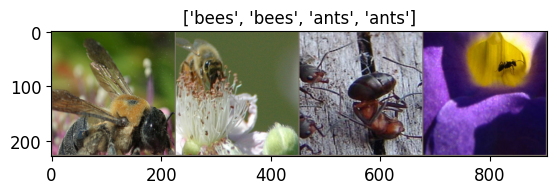

In [47]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [48]:
#Notice that resnet by default is designed for 1000 classes so we change that to 2
resnet_untrained = nn.Sequential(
    resnet34(pretrained=False),
    nn.Linear(1000, 2)
)
print(resnet_untrained)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Sequential(
  (0): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [49]:
optimizer = torch.optim.Adam(resnet_untrained.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
num_epochs = 20
history, resnet_untrained = train_and_validate(dataloaders['train'], dataloaders['val'], resnet_untrained, optimizer, criterion, num_epochs, metric=accuracy_metric, scheduler=None, device=device)

Epoch [1/20], Train Loss: 0.6947, Train Metric: 0.5205, Val Loss: 0.6573, Val Metric: 0.6090
Epoch [2/20], Train Loss: 0.6899, Train Metric: 0.5533, Val Loss: 0.6630, Val Metric: 0.5192
Epoch [3/20], Train Loss: 0.6726, Train Metric: 0.5902, Val Loss: 0.7476, Val Metric: 0.5192
Epoch [4/20], Train Loss: 0.6526, Train Metric: 0.6270, Val Loss: 0.7317, Val Metric: 0.5641
Epoch [5/20], Train Loss: 0.6715, Train Metric: 0.5984, Val Loss: 0.6414, Val Metric: 0.6346
Epoch [6/20], Train Loss: 0.6305, Train Metric: 0.6393, Val Loss: 0.6435, Val Metric: 0.5769
Epoch [7/20], Train Loss: 0.6040, Train Metric: 0.6721, Val Loss: 0.6315, Val Metric: 0.6474
Epoch [8/20], Train Loss: 0.6220, Train Metric: 0.6516, Val Loss: 0.6722, Val Metric: 0.6346
Epoch [9/20], Train Loss: 0.6100, Train Metric: 0.6762, Val Loss: 0.6827, Val Metric: 0.6090
Epoch [10/20], Train Loss: 0.6172, Train Metric: 0.6434, Val Loss: 0.6724, Val Metric: 0.6474
Epoch [11/20], Train Loss: 0.6552, Train Metric: 0.5861, Val Loss: 0.

In [50]:
resnet_pretrained = nn.Sequential(
    resnet34(pretrained=True),
    nn.Linear(1000, 2)
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 165MB/s]


In [51]:
optimizer = torch.optim.Adam(resnet_pretrained.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
num_epochs = 20
history, resnet_pretrained = train_and_validate(dataloaders['train'], dataloaders['val'], resnet_pretrained, optimizer, criterion, num_epochs, metric=accuracy_metric, scheduler=None, device=device)

Epoch [1/20], Train Loss: 0.5699, Train Metric: 0.7090, Val Loss: 0.2925, Val Metric: 0.8846
Epoch [2/20], Train Loss: 0.3829, Train Metric: 0.8033, Val Loss: 0.2633, Val Metric: 0.8846
Epoch [3/20], Train Loss: 0.3430, Train Metric: 0.8648, Val Loss: 0.2251, Val Metric: 0.9295
Epoch [4/20], Train Loss: 0.4018, Train Metric: 0.8197, Val Loss: 0.2434, Val Metric: 0.9231
Epoch [5/20], Train Loss: 0.2933, Train Metric: 0.8648, Val Loss: 0.2389, Val Metric: 0.9295
Epoch [6/20], Train Loss: 0.3594, Train Metric: 0.8484, Val Loss: 0.2417, Val Metric: 0.9231
Epoch [7/20], Train Loss: 0.3306, Train Metric: 0.8648, Val Loss: 0.2133, Val Metric: 0.9359
Epoch [8/20], Train Loss: 0.2566, Train Metric: 0.8893, Val Loss: 0.2162, Val Metric: 0.9167
Epoch [9/20], Train Loss: 0.2555, Train Metric: 0.8770, Val Loss: 0.2484, Val Metric: 0.8974
Epoch [10/20], Train Loss: 0.2628, Train Metric: 0.9057, Val Loss: 0.2252, Val Metric: 0.9103
Epoch [11/20], Train Loss: 0.2433, Train Metric: 0.9098, Val Loss: 0.

**Task 5:**
- Task 5a) Explain transfer learning and its benefits
- Task 5b) Compare the two trainings above (with/without base model trainable). <br>
What is the difference and which one performs better here?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 5a) answer: **Basically, it's repurposing a model developed for one task on another. It's super useful in deep learning because it's able to apply pre-trained models on large datasets, facilitating faster convergence and requiring significantly less data for training. Transfer learning speeds up training, reduces data requirements, improves model performance, and allows you to apply advanced models fine-tuned on a variety of datasets. Using this approach not only saves time and resources, but it also enhances the model's ability to generalize from limited data, making it a good strategy when it's tough to collect big labeled datasets.**

Task 5b) answer: **In training ResNet models, two distinct approaches are discussed: building a model from scratch versus using a pre-trained model. When compared to a ResNet model trained from scratch, pre-trained ResNets with an additional linear layer generally offer better performance. Due to the pre-trained model's initialization with weights that have already learned how to extract useful features from a large and diverse dataset, this improvement is possible. Consequently, it can generalize more effectively to the new task, especially if the new dataset is small or the task is close to its initial training domain. In both cases, choosing an appropriate learning rate is crucial to adjusting model weights without erasing valuable pre-learned features. Thus, pre-trained models are typically better at machine learning, making them a preferred approach.**

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Task 6: High Accuracy CNN for MNIST
Build your own CNN and try to achieve the highest possible accuracy on MNIST. <br>
A basic structure is given below, play around with it.

Try a model which uses 2 convolutional layers, followed by 1 pooling layer, <br>
then dropout 25%, then a Linear layer, another dropout layer but with 50% <br> dropout, and finally the output layer. It reaches about 99.2% accuracy on the <br>
test set. This places this model roughly in the top 20% in the <br>
[MNIST Kaggle competition](https://www.kaggle.com/c/digit-recognizer/).

In order to reach an accuracy higher than 99.5% on the test set you might try:

a) batch normalization layers<br>
b) set a learning scheduler (Check Chapter 11)<br>
c) add image augmentation (Check Chapter 14)<br>
d) create an ensemble (Check Chapter 14)<br>
e) use hyperparameter tuning

As long as you implement at least **two** of the above you will get full points <br>
on this one.

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/30
1875/1875 [==============================] - 16s 6ms/step - loss: 0.4231 - accuracy: 0.8660 - val_loss: 0.0680 - val_accuracy: 0.9789 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2030 - accuracy: 0.9348 - val_loss: 0.0519 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1538 - accuracy: 0.9509 - val_loss: 0.0447 - val_accuracy: 0.9872 - lr: 0.0010
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1246 - accuracy: 0.9593 - val_loss: 0.0387 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1048 - accuracy: 0.9671 - val_loss: 0.0339 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0836 - accuracy: 0.9747 - val_loss: 0.0380 - val_accuracy: 0.9886 

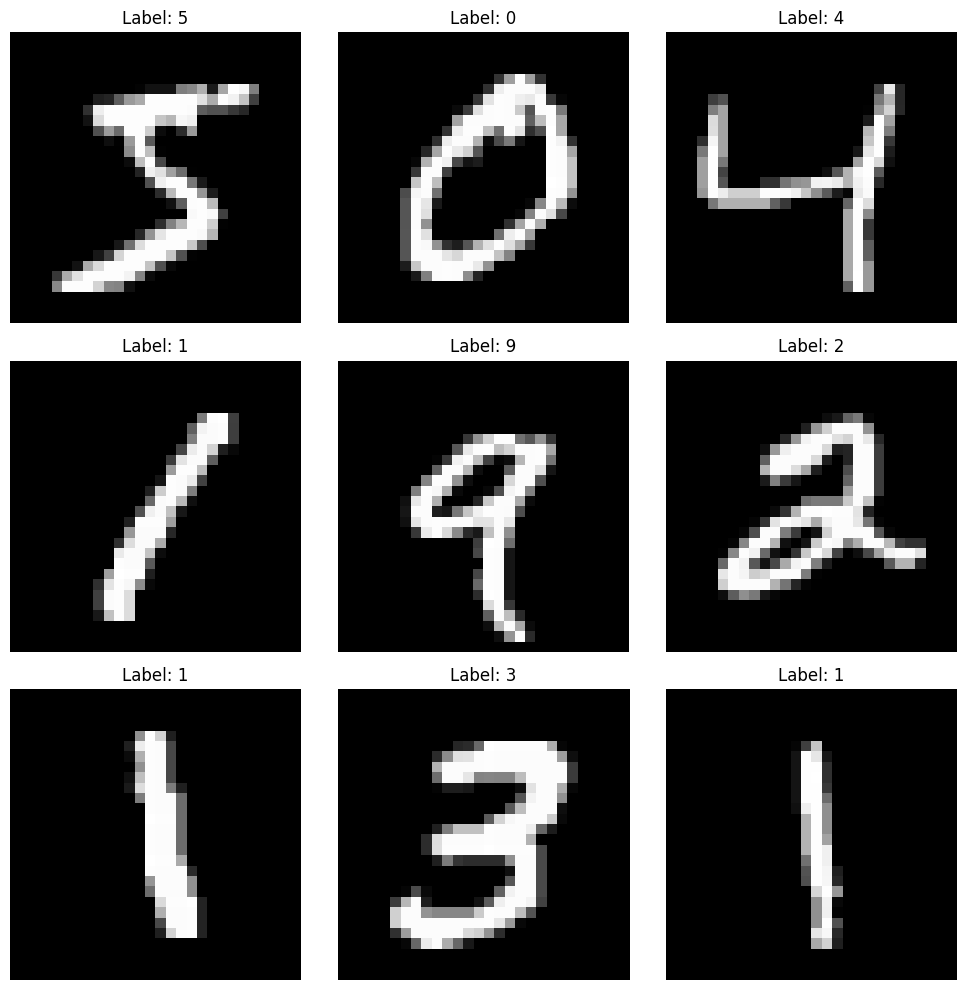

In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

# Load and preprocess data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=None, input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

scheduler_callback = callbacks.LearningRateScheduler(lr_scheduler)

# Train the model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), callbacks=[scheduler_callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Visualize training examples
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
